In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import timedelta as timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import pymysql
pymysql.install_as_MySQLdb()

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

In [10]:
#engine.execute('select * from Measurement').fetchall()
#After about 20 or 30 minutes of testing I found the fetchall function useful for displaying data. 
#Numerous attempts to display the hawaii table failed, regardless of what I did. Base.metadata.tables
Measurement.metadata.tables
#using the metadata function to know what I can query. 

immutabledict({'measurement': Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None), 'station': Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)})

# Exploratory Climate Analysis

<IPython.core.display.Javascript object>


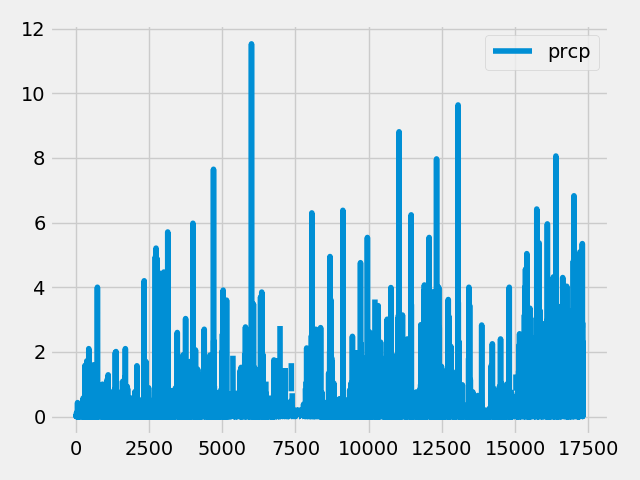

In [24]:
# Design a query to retrieve the last 12 months from 08-23-2017 of precipitation data and plot the results
PCPT = session.query(Measurement.prcp).\
    filter(Measurement.date <= yesterday)
PCPT.all()
df = pd.read_sql(PCPT.statement, PCPT.session.bind)
# Calculate the date 1 year ago from today
year = timedelta(days=365)
today = dt.date(2017, 8, 23)
yesterday = today - timedelta(days=365) 
# Perform a query to retrieve the data and precipitation scores
yearof = session.query(Measurement.date).\
    filter(Measurement.date <= yesterday)
yearof.all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df2 = pd.read_sql(yearof.statement, yearof.session.bind)
# Sort the dataframe by date
df2.head()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind="line")
plt.show()
plt.tight_layout()
# Rotate the xticks for the dates
x_axis = df2
tick_locations = [value for value in x_axis]

In [23]:
# Use Pandas to calculate the summary statistics for the precipitation data
#df.head()
df2.head()
#even though I got the graph to show I couldn't get it to plot be date, but since I know the worst of precipitation is in the recent months

,date
0,2010-01-01
1,2010-01-02
2,2010-01-03
3,2010-01-04
4,2010-01-06


In [28]:
# How many stations are available in this dataset?
STA = session.query(Measurement.station)
STAD = pd.read_sql(STA.statement, STA.session.bind)
len(STAD)

19550

In [31]:
# What are the most active stations?
# List the stations and the counts in descending order.
xA = STAD
yA = PCPT
plt.scatter(xA, yA, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.show()
plt.tight_layout()
#tried plotting but apparently it has the wrong "energies"

TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
#not sure how to do this without pulling the data from the weather API, and I don't have time to do that between work and HTML classes

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#read above comment

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
